In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install joblib

In [3]:
# input folder
from pathlib import Path
Path('/kaggle/working/oral-diseases/').mkdir(parents=True, exist_ok=True)

In [4]:
import shutil
import os

# Caries.
# The source path
caries_file_path = Path('/kaggle/input/oral-diseases/Data caries/Data caries/caries augmented data set/preview')

# The destination path
caries_new_directory = Path('/kaggle/working/oral-diseases/caries')

# Copying data from input folder to working folder
shutil.copytree(caries_file_path, caries_new_directory)

PosixPath('/kaggle/working/oral-diseases/caries')

In [5]:
# Calculus
# The source path
calculus_file_path = Path('/kaggle/input/oral-diseases/Calculus/Calculus')
# The destination path
calculus_new_directory = Path('/kaggle/working/oral-diseases/calculus')
# Copying data from input folder to working folder
shutil.copytree(calculus_file_path, calculus_new_directory)

#Gingivitis
# The source path
gingivitis_file_path = Path('/kaggle/input/oral-diseases/Gingivitis/Gingivitis')
# The destination path
gingivitis_new_directory = Path('/kaggle/working/oral-diseases/gingivitis')
# Copying data from input folder to working folder
shutil.copytree(gingivitis_file_path, gingivitis_new_directory)

#Ulcers
# The source path
ulcer_file_path = Path('/kaggle/input/oral-diseases/Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview')
# The destination path
ulcer_new_directory = Path('/kaggle/working/oral-diseases/ulcers')
# Copying data from input folder to working folder
shutil.copytree(ulcer_file_path, ulcer_new_directory)

#Tooth Discoloration
# The source path
toothDiscoloration_file_path = Path('/kaggle/input/oral-diseases/Tooth Discoloration/Tooth Discoloration /Tooth_discoloration_augmented_dataser/preview')
# The destination path
toothDiscoloration_new_directory = Path('/kaggle/working/oral-diseases/toothDiscoloration')
# Copying data from input folder to working folder
shutil.copytree(toothDiscoloration_file_path, toothDiscoloration_new_directory)

#hypodontia
# The source path
hypodontia_file_path = Path('/kaggle/input/oral-diseases/hypodontia/hypodontia')
# The destination path
hypodontia_new_directory = Path('/kaggle/working/oral-diseases/hypodontia')
# Copying data from input folder to working folder
shutil.copytree(hypodontia_file_path, hypodontia_new_directory)

PosixPath('/kaggle/working/oral-diseases/hypodontia')

In [6]:
# The different classes we have from the folders
import os
build_dir = "/kaggle/working/oral-diseases"
caries_dir = os.path.join(build_dir,'caries')
gingivitis_dir = os.path.join(build_dir,'gingivitis')
toothDiscoloration_dir = os.path.join(build_dir,'toothDiscoloration')
ulcers_dir = os.path.join(build_dir,'ulcers')
hypodontia_dir = os.path.join(build_dir,'hypodontia')
calculus_dir = os.path.join(build_dir,'calculus')
os.listdir(build_dir)

['hypodontia',
 'gingivitis',
 'caries',
 'toothDiscoloration',
 'calculus',
 'ulcers']

In [7]:
# Showing the total number of images from each class/folder
import pandas as pd

data = pd.DataFrame(data=[len(os.listdir(caries_dir)), len(os.listdir(gingivitis_dir)),
                   len(os.listdir(toothDiscoloration_dir)), len(os.listdir(ulcers_dir)),
                   len(os.listdir(hypodontia_dir)),
                   len(os.listdir(calculus_dir))], index=['Caries', 'Gingivitis',
                                                                    'toothDiscoloration', 'ulcers',
                                                                    'hypodontia', 'calculus'],
              columns=['Total Images'])

In [8]:
data.to_csv('data_distribution.csv')

In [9]:
data

,Total Images
Caries,2382
Gingivitis,2349
toothDiscoloration,1834
ulcers,2541
hypodontia,1251
calculus,1296


In [10]:
# Sample of caries
from PIL import Image
import matplotlib.pyplot as plt

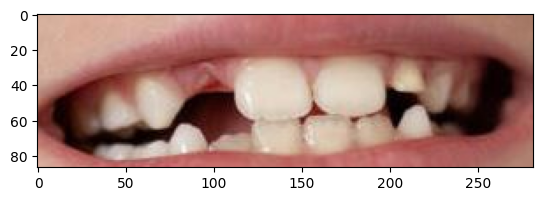

In [11]:
# Sample of hypodontia
hypodontiaimg=Image.open("/kaggle/working/oral-diseases/hypodontia/(25).JPG")
plt.imshow(hypodontiaimg)

In [12]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
import time
import joblib

In [13]:
# Define the dataset directory and classes
dataset_dir = "/kaggle/working/oral-diseases"
classes = ['caries', 'gingivitis', 'toothDiscoloration', 'ulcers', 'hypodontia', 'calculus']

In [14]:
# Function to load images and extract features
def load_images_and_features(dataset_dir, classes):
    images = []
    labels = []
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (256, 256))

            # Extract HOG features for each color channel and concatenate
            hog_features = []
            for channel in range(img.shape[2]):
                channel_features, _ = hog(img[:, :, channel], orientations=8, pixels_per_cell=(16, 16),
                                          cells_per_block=(1, 1), visualize=True)
                hog_features.append(channel_features)
            features = np.concatenate(hog_features, axis=0)

            images.append(features)
            labels.append(label)

    return np.array(images), np.array(labels)

In [15]:
# Load the dataset
X, y = load_images_and_features(dataset_dir, classes)

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True)),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [18]:
import os

# File path for the CSV
results_file = 'model_evaluation_results.csv'

# Check if the results file exists and load it, else create a new DataFrame
if os.path.isfile(results_file):
    results_df = pd.read_csv(results_file)
else:
    results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Training Time (s)"])

# Train, evaluate each classifier, and update results
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    print(f"Total Training time for {name}: ", training_time)

    y_pred = clf.predict(X_test)
    
    # Save the trained model
    model_filename = f"{name.replace(' ', '_')}_model.joblib"
    joblib.dump(clf, model_filename)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']

    # Create a temporary DataFrame
    temp_df = pd.DataFrame({
        "Model": [name],
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1-Score": [f1_score],
        "Training Time (s)": [training_time]
    })

    # Append to existing DataFrame and save
    results_df = pd.concat([results_df, temp_df], ignore_index=True)
    results_df.to_csv(results_file, index=False)

    # Print report
    print(f"{name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}, Training Time: {training_time:.2f} seconds")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['caries', 'gingivitis', 'toothDiscoloration', 'ulcers', 'hypodontia', 'calculus'],yticklabels=['caries', 'gingivitis', 'toothDiscoloration', 'ulcers', 'hypodontia', 'calculus'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(f"confusion_matrix_{name}.png")
    plt.close()


Total Training time for Random Forest:  86.10814142227173
Random Forest - Accuracy: 0.5583190394511149, Precision: 0.5787614495924275, Recall: 0.5523289878700578, F1-Score: 0.549712193673363, Training Time: 86.11 seconds
Total Training time for SVM:  1333.0890436172485
SVM - Accuracy: 0.5660377358490566, Precision: 0.5927034187424455, Recall: 0.5851830704471608, F1-Score: 0.5867901281356814, Training Time: 1333.09 seconds
Total Training time for K-Nearest Neighbors:  0.04128146171569824
K-Nearest Neighbors - Accuracy: 0.5222984562607204, Precision: 0.5367588255368692, Recall: 0.5416969792624938, F1-Score: 0.5300251329034954, Training Time: 0.04 seconds
Total Training time for Naive Bayes:  0.6105990409851074
Naive Bayes - Accuracy: 0.44168096054888506, Precision: 0.4275260302161652, Recall: 0.43082416236535703, F1-Score: 0.42235720389146086, Training Time: 0.61 seconds
Total Training time for Decision Tree:  105.51359367370605
Decision Tree - Accuracy: 0.4236706689536878, Precision: 0.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Total Training time for Logistic Regression:  230.3649923801422
Logistic Regression - Accuracy: 0.5471698113207547, Precision: 0.5713348511160629, Recall: 0.5664151620570738, F1-Score: 0.5679735317458835, Training Time: 230.36 seconds
Total Training time for Gradient Boosting:  14248.246028661728
Gradient Boosting - Accuracy: 0.5617495711835334, Precision: 0.5808587558988149, Recall: 0.5561262576567042, F1-Score: 0.5620343318621561, Training Time: 14248.25 seconds
Total Training time for AdaBoost:  970.2718508243561
AdaBoost - Accuracy: 0.45797598627787306, Precision: 0.4414817150381096, Recall: 0.43504694575793496, F1-Score: 0.4316031112154182, Training Time: 970.27 seconds
Total Training time for Extra Trees:  36.47813129425049
Extra Trees - Accuracy: 0.5634648370497427, Precision: 0.5958460776430647, Recall: 0.5560649375376095, F1-Score: 0.5560719558438141, Training Time: 36.48 seconds
Total Training time for XGBoost:  747.5342781543732
XGBoost - Accuracy: 0.6054888507718696, Precis